In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import math
import numpy as np
import sys

In [ ]:
class Problem:
    
    def random_solution(self):
        # this method returns a random solution for a given problem
        # used to create initial population
        return []
    
    def evaluate(self, s):
        # this method returns the quality of a given solution s
        # used to determine the quality of a solution and to choose which one should we keep
        return 0.0
    
    def mutate(self, s):
        # this method returns a slightly modified solution s
        return s[:]
    
    def crossover(self, s1, s2):
        # this method returns a solution that is a combination of its parent solutions - s1 and s2
        return s1[:]
    
    # display method to help visualize the algorithm
    def display_solution_param(self, s):
        print(s)

In [ ]:
class TSP(Problem):
    cities = 0
    distances = []
    locations = []
    
    def __init__(self, cities, city_coords=None, seed=4432):
        # we draw random locations for the cities and we prepare a matrix of distances between them
        
        random.seed(seed)
        self.cities = cities
        
        self.locations = []
        if city_coords is None:
            for i in range(cities):
                self.locations.append((random.random(), random.random()))
        else:
            for i in range(cities):
                self.locations.append(city_coords[i])
        
        self.distances = []
        for i in range(cities):
            self.distances.append([])
            for j in range(cities):
                self.distances[i].append(self.distance(i, j))
                
    def distance(self, c1, c2):
        # euclidean distance between two points on a map
        
        loc1, loc2 = self.locations[c1], self.locations[c2]
        return math.sqrt((loc1[0]-loc2[0])**2 + (loc1[1]-loc2[1])**2)
    
    def random_solution(self):
        # we return a random permutation of numbers, which corresponds to a random order of visiting cities
        
        s = [i for i in range(self.cities)]
        random.shuffle(s)
        return s
    
    def evaluate(self, s):
        # length of the route is equal to the sum of distances between all subsequent cities
        # we include the first and last city aswell because the path is a loop
        
        fit = 0
        for i in range(len(s)):
            fit += self.distances[s[i]][s[i+1 if i+1<len(s) else 0]]
        return fit
    
    def mutate(self, s):
        # to mutate a solution, we reverse a random subsequence of the solution
        # the route is a loop, so we need to handle the subsequences that cross the end of the array

        sol = s[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c1 < c2:
            rev = sol[c1:c2+1]
            rev.reverse()
            sol[c1:c2+1] = rev
        else:
            rev = sol[c1:] + sol[:c2+1]
            rev.reverse()
            sol[:(c2+1)] = rev[-(c2+1):]
            sol[c1:] = rev[:-(c2+1)]
        return sol
    
    def crossover(self, s1, s2):
        # to combine two different routes, we use OX (order crossover)
        
        sol1, sol2 = s1[:], s2[:]
        c1, c2 = random.sample(range(0, self.cities), 2)
        if c2 < c1:
            ctmp = c1
            c1 = c2
            c2 = ctmp
        sol1[c1:c2+1] = list(filter(lambda x: x in sol1[c1:c2+1], s2))
        sol2[c1:c2+1] = list(filter(lambda x: x in sol2[c1:c2+1], s1))
        
        return sol1, sol2
    
    def display_solution(self, solution):
        fig, ax = plt.subplots(figsize=(8, 8))

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)
            
        plt.xlim((-0.03,1.03))
        plt.ylim((-0.03,1.03))
        plt.show()

In [ ]:
class TSP_Poland(TSP):

    def dist(self, x1, y1, x2, y2):
        return ((x1-x2)**2+(y1-y2)**2)**(1/2)

    def __init__(self, seed=1):
        city_names = ["Poznan", "Wroclaw", "Krakow", "Warszawa", "Gdansk", "Katowice", "Lodz",
                       "Bialystok", "Rzeszow", "Szczecin", "Lublin", "Olsztyn", "Kielce", "Gdynia", "Bydgoszcz", "Zakopane"]
        city_coords = {
            "Poznan": (52.409538, 16.931992),
            "Wroclaw": (51.107883, 17.038538),
            "Krakow": (50.049683, 19.944544),
            "Warszawa": (52.237049, 21.017532),
            "Gdansk": (54.372158, 18.638306),
            "Katowice": (50.270908, 19.039993),
            "Lodz": (51.759445, 19.457216),
            "Bialystok": (53.13333, 23.16433),
            "Rzeszow": (50.041187, 21.999121),
            "Szczecin": (53.42894, 14.55302),
            "Lublin": (51.25, 22.56667),
            "Olsztyn": (53.77995, 20.49416),
            "Kielce": (50.87033, 20.62752),
            "Gdynia": (54.51889, 18.53188),
            "Bydgoszcz": (53.1235, 18.00762),
            "Zakopane": (49.29899, 19.94885)
        }      
        super().__init__(len(city_names), [city_coords[city] for city in city_names], seed)
    
    
    
    def force_aspect(self, ax, aspect=1):
        im = ax.get_images()
        extent =  im[0].get_extent()
        ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)
        
        
    def display_solution(self, solution):
        self.display_solution_param(solution, True, [11.328361, 27.045778], [49.0025, 54.835778])
        
    def display_solution_param(self, solution, show_map, xlim, ylim):
        fig, ax = plt.subplots(figsize=(8, 8))
        
        if show_map:
            datafile = 'polska.png'
            img = mpimg.imread(datafile)
            plt.imshow(img, zorder=0, extent=[14.245, 24.129139, 49.0025, 54.835778])

        x = [i[1] for i in [self.locations[c] for c in solution]]
        y = [i[0] for i in [self.locations[c] for c in solution]]
        x.append(x[0])
        y.append(y[0])
        line, = ax.plot(x, y, 'go-',linewidth=2)

        if show_map:
            plt.xlabel('Longitude')
            plt.ylabel('Latitude')
            self.force_aspect(ax)
            
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.show()

**Task 1:** Generate a random route for the TSP_Poland problem. Display the route and three possible mutations of that route. Repeat that for a new instance of the problem. Did the routes change? Why / why not?

Yes, the routes changed, because we mutated the solution resulting in the change of order of citites.

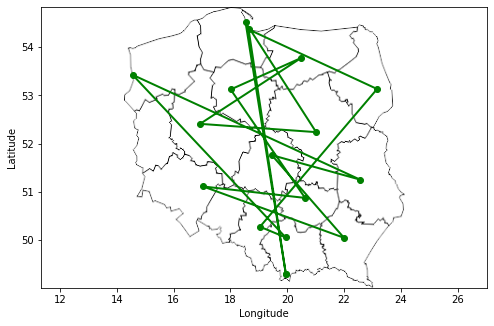

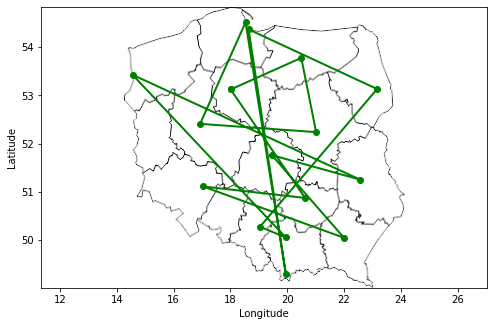

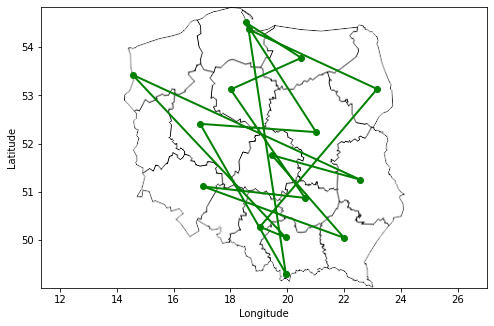

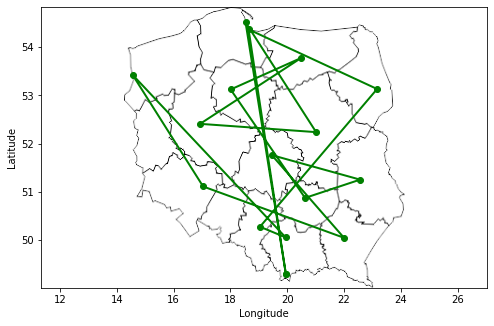

In [ ]:
t = TSP_Poland(TSP)
r = t.random_solution()
t.display_solution(r)
r2 = t.mutate(r)
t.display_solution(r2)
r3 = t.mutate(r)
t.display_solution(r3)
r4 = t.mutate(r)
t.display_solution(r4)

**Task 2:** Implement an algorithm searching for the best solution by generating random solutions. Write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluations over 10 runs.

In [ ]:
t = TSP_Poland(TSP)
Avrg = []
for j in range(1,5):
    avrg = []
    for k in range(10):
        Sum = float('inf')
        for i in range(10**j):
            r = t.random_solution()
            x = t.evaluate(r)
            if x < Sum:
                Sum = x
        avrg.append(Sum)
    Avrg.append(avrg)
for elem in Avrg:
  print(np.average(elem))



49.35357718403409
44.96949938842103
39.646086036467885
37.046276683420935


**Task 3:** Implement the generational evolutionary algorithm with tournament selection. Let it be parametrized with four parameters: the size of the population $N$, the size of the tournament $t$, the probability of mutation $p_m$ and the probability of crossover $p_c$. The algorithm should terminate automatically after 50 generations with no improvement.

* Assume $N=20$, $t=3$, $p_m=0.6$ and $p_c=0.2$. For the TSP_Poland problem, write down the average fitness of the best solution after 10, 100, 1000 and 10 000 evaluations over 10 runs. Does the algorithm find better solutions than random search?
* What is the difference between random search and evolution?

In [ ]:
def XO(sol1, sol2, P):
  temp = np.random.random(1)
  if temp <= P:
    sol1, sol1 = t.crossover(sol1, sol2)
  return sol1, sol2 
def mut(sol1, P):
  temp = np.random.random(1)
  if temp <= P:
    sol1 = t.mutate(sol1)
  return sol1

In [ ]:
def Tournament(arr, k):
  temp = sorted(random.sample(arr, k), key = lambda x: x[1])
  return temp[0]

In [ ]:
t = TSP_Poland(TSP)
def evol_alg(N, tur, pm, pc, best, cur, lim, imp=0):
  Pop = sorted(N, key = lambda x: t.evaluate(x))
  
  New_Pop = []
  for _ in range(len(Pop)//2):
    W1 = Tournament(Pop, tur)
    W2 = Tournament(Pop, tur)
    W1, W2 = XO(W1, W2, pc)
    W1 = mut(W1, pm)
    W2 = mut(W2, pm)
    New_Pop.append(W1)
    New_Pop.append(W2)


  New_Pop = sorted(New_Pop, key = lambda x: x[1])


  if cur > lim or imp == 50:
    return Pop[0][1], Pop
  else:
    if New_Pop[0][1] < best:
      return evol_alg(New_Pop, tur, pm, pc, New_Pop[0][1], cur+1, lim)
    else:
      return evol_alg(New_Pop, tur, pm, pc, best, cur+1, lim, imp+1)

In [ ]:
t = TSP_Poland(TSP)
def evol_alg(N, tur, pm, pc, cur, lim, imp=0):
  if type(N) == int:
    Pop = [t.random_solution() for _ in range(N)]
  elif type(N) == list:
    Pop = N

  New_Pop = []
  for _ in range(len(Pop)):
    temp = random.sample(Pop, tur)
    temp = sorted(temp, key = lambda x: t.evaluate(x))
    New_Pop.append(temp[0])

  for sol in New_Pop:
    sol1 = mut(sol, pm)
    New_Pop.remove(sol)
    New_Pop.append(sol1)
  for i in range(len(New_Pop)//2):
    sol1, sol2 = New_Pop[i], New_Pop[i+1]
    New_Pop.remove(sol1)
    New_Pop.remove(sol2)
    sol1, sol2 = XO(sol1, sol2, pc)
    New_Pop.append(sol1)
    New_Pop.append(sol2)

  New_Pop = sorted(New_Pop, key = lambda x: t.evaluate(x))
  Pop = sorted(Pop, key = lambda x: t.evaluate(x))

  if cur > lim or imp == 50:
    return t.evaluate(Pop[0]), Pop
  else:
    if t.evaluate(New_Pop[0]) < t.evaluate(Pop[0]):
      return evol_alg(New_Pop, tur, pm, pc, cur+1, lim)
    else:
      return evol_alg(New_Pop, tur, pm, pc, cur+1, lim, imp+1)

26.969402158505247
[[ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 5 15  2 12  8 10  7  3 11  4 13 14  0  9  1  6]
 [ 4 11  3  7 10  8 12  2 15  5  6  1  9  0 14 13]
 [ 7 13  4 11  3  1  9  0 14  6  5 15  2 12  8 10]
 [ 5 15  2 12 14 13  4 11  3  7 10  8  0  9  1  6]
 [ 5 15  2  0 14 13  4 11  3  7 10  8 12  9  1  6]
 [ 2  0  9  8 12 10  7  3 11  4 13 14  1  6  5 15]
 [ 7 13  0  9  1  6  3  5 11  4 14 15  2 12  8 10]
 [ 4 11  3 1

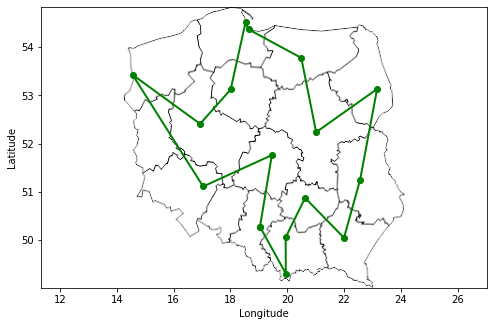

In [ ]:
t = TSP_Poland(TSP)
result, sol = evol_alg(20, 3, 0.6, 0.2, 1, 10000)
print(result)
sol = np.array(sol)
sol.shape = (len(sol), len(sol[0]))
print(sol)
t.display_solution(sol[0])

In [ ]:
for i in range(1,5):
  sum = 0
  for k in range(10):
    result, sol = evol_alg(20, 3, 0.6, 0.2, 1, 10**i)
    sum += result
  print(sum/10)


39.29831472385675
28.052252677857645
27.71945092824933
27.673616673477937


Yes, this algorithm finds way better solutions than random search


**Task 4:** Perform some experiments using different instance sizes for the TSP problem. How do the parameters of the algorithm influence the quality of the solutions found by the algorithm? How do they influence the total number of evaluations made before the algorithm halts? Are the optimal parameter values the same for small and big instances of the TSP problem? Why / why not?

Higher popsize seems to slightly increase overall accuracy of the algorithm. Tournament size influences the performance of the algorithm the most. Probability of mutation is needed for the program to improve however if the probabilty is too big it results in lack of convergence of the algorithm. Probability of crossover doesnt seem to influence the perfomence of the algorithm much. Optimal tournaments size seems to be the same for both big and small instances, but f.e mutation seems to perform way better on big instances than small ones 

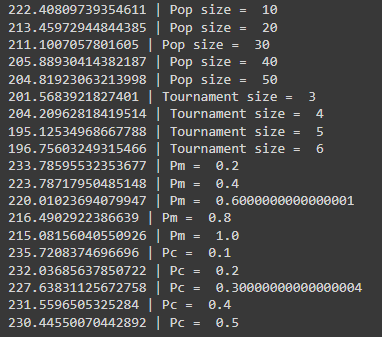

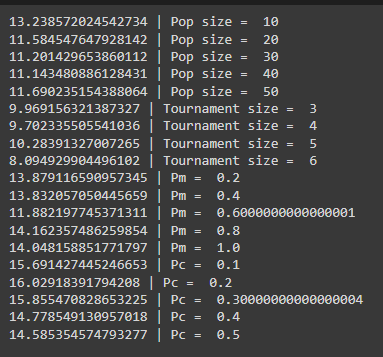


In [ ]:
t = TSP(500)
for j in range(1,6):
  result, sol = evol_alg(10*j, 3, 0.6, 0.2, 1, 100)
  print(result,'|', 'Pop size = ', 10*j)
for k in range(3,7):
  result, sol = evol_alg(10*j, k, 0.6, 0.2, 1, 100)
  print(result,'|', 'Tournament size = ', k)
for k in range(1,6):
  result, sol = evol_alg(10, 3, 0.2*k, 0.2, 1, 100)
  print(result,'|', 'Pm = ', 0.2*k)
for k in range(1,6):
  result, sol = evol_alg(10, 3, 0.2, 0.1*k, 1, 100)
  print(result,'|', 'Pc = ', 0.1*k)

222.40809739354611 | Pop size =  10
213.45972944844385 | Pop size =  20
211.1007057801605 | Pop size =  30
205.88930414382187 | Pop size =  40
204.81923063213998 | Pop size =  50
201.5683921827401 | Tournament size =  3
204.20962818419514 | Tournament size =  4
195.12534968667788 | Tournament size =  5
196.75603249315466 | Tournament size =  6
233.78595532353677 | Pm =  0.2
223.78717950485148 | Pm =  0.4
220.01023694079947 | Pm =  0.6000000000000001
216.4902922386639 | Pm =  0.8
215.08156040550926 | Pm =  1.0
235.7208374696696 | Pc =  0.1
232.03685637850722 | Pc =  0.2
227.63831125672758 | Pc =  0.30000000000000004
231.5596505325284 | Pc =  0.4
230.44550070442892 | Pc =  0.5


**Task 5:**

* What is the role of a mutation operator in evolutionary algorithms?
* What are the properties of a good mutation operator?
* What is the role of a crossover operator in evolutionary algorithms?
* What are the properties of a good crossover operator?
* What does it mean for the population to converge?
* How do the parameters of the evolutionary algorithm affect the speed of its convergence?
* Does the speed of the algorithm's convergence correlate with the quality of the solutions? What is the reason?
* Can a population escape from a local optimum once it has converged?



*   Mutation operator introduces diversity and change into the algorithmm, makes it possible for the algorithm to find new solutions.
*   Good mutation operator ensures that the program searches the solution space thoroughly however it doesnt prevent the program from converging.

*   Crossover operator allows us to effieciently use 2 good solutions to check whether there lies an optimum between those 2 solutions in the solution space.
*   Good crossover operator similarily to good mutation operator ensures thorough search through the solution space but doesnt prevent it from converging.


*   It means that all the solutions in the population are essentialy the same and the algorithm will no longer find new solutions
*   good mutation and crossover operators ensure diversity in the population throught the working time of the program.


*   If an algorithm converges too quickly it is very likely that it found a local optimum that is usually not the best solution in the searchspace, prematurely convergant algorithm usually finds solutions of less quality than algorithms that thoroughly searched the solution space for global optimum.
*   If an algorithm allows taking worse solutions or has strong mutation operator it is possible for it to escape local optimum.







